In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [30]:
holidays = pd.read_csv('C:/Users/Jain-IT/Desktop/finance/holidays_events.csv',parse_dates=['date'])
oil = pd.read_csv('C:/Users/Jain-IT/Desktop/finance/oil.csv',parse_dates=['date'])
stores = pd.read_csv('C:/Users/Jain-IT/Desktop/finance/stores.csv')
transactions = pd.read_csv('C:/Users/Jain-IT/Desktop/finance/transactions.csv',parse_dates=['date'])

In [31]:
train = pd.read_csv('C:/Users/Jain-IT/Desktop/finance/train.csv',parse_dates=['date'])
test = pd.read_csv('C:/Users/Jain-IT/Desktop/finance/test.csv',parse_dates=['date'])

MemoryError: Unable to allocate 1.00 MiB for an array with shape (131072,) and data type int64

In [32]:
df=train.copy()
df_test=test.copy()


MemoryError: Unable to allocate 68.7 MiB for an array with shape (3, 3000888) and data type int64

In [6]:
print(f'The range of date:{str(df.date.iloc[0]).split()[0]} to {str(df.date.iloc[-1]).split()[0]}')
print(f'The range of test set:{str(df_test.date.iloc[0]).split()[0]} to {str(df_test.date.iloc[-1]).split()[0]}')

The range of date:2013-01-01 to 2017-08-15
The range of test set:2017-08-16 to 2017-08-31


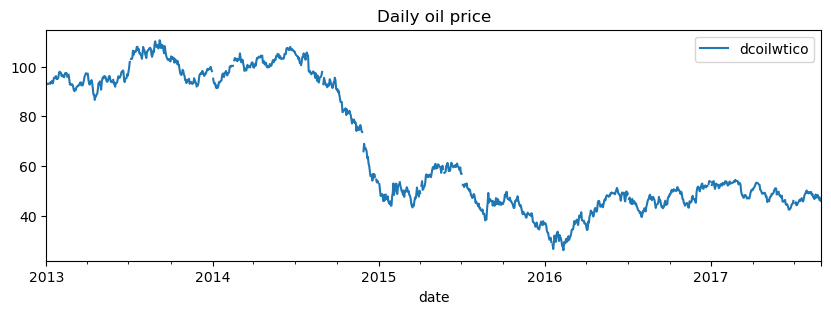

In [7]:
oil.plot(x='date',y='dcoilwtico', figsize=(10,3), title= 'Daily oil price' )
plt.xlable="Date"
plt.ylable="Oil price"
plt.show()


In [8]:
oil.dcoilwtico=oil.dcoilwtico.bfill()
oil=oil.set_index('date').resample(rule= "D").ffill().reset_index()

In [9]:
holidays.locale.unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [10]:
holidays.locale=holidays.locale.map({'Regional':1, 'Local':2, 'National':3})
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,2,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,1,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,2,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,2,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,2,Riobamba,Cantonizacion de Riobamba,False


In [11]:
holidays[holidays.date.duplicated(keep=False)]

,date,type,locale,locale_name,description,transferred
7,2012-06-25,Holiday,1,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,2,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,2,Machala,Fundacion de Machala,False
10,2012-07-03,Holiday,2,Santo Domingo,Fundacion de Santo Domingo,False
11,2012-07-03,Holiday,2,El Carmen,Cantonizacion de El Carmen,False
...,...,...,...,...,...,...
319,2017-07-03,Holiday,2,Santo Domingo,Fundacion de Santo Domingo,False
341,2017-12-08,Holiday,2,Loja,Fundacion de Loja,False
342,2017-12-08,Transfer,2,Quito,Traslado Fundacion de Quito,False
344,2017-12-22,Holiday,2,Salinas,Cantonizacion de Salinas,False


In [12]:
# Use groupby and max to get the max locale value on a holiday
holidays = holidays.groupby('date').max(numeric_only=True)
holidays.reset_index(inplace=True)

# Dropping transferred column
holidays.drop('transferred',axis=1,inplace=True)
holidays.head()

,date,locale
0,2012-03-02,2
1,2012-04-01,1
2,2012-04-12,2
3,2012-04-14,2
4,2012-04-21,2


In [13]:
df=pd.merge(df,oil,on='date', how= 'left')
df=pd.merge(df,stores,on='store_nbr', how="left")
df=pd.merge(df,holidays, on='date', how='left')

In [14]:
df.locale.fillna(0,inplace= True)
df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dcoilwtico     0
city           0
state          0
type           0
cluster        0
locale         0
dtype: int64

In [15]:
df_test=pd.merge(df_test,oil,on='date',how='left')
df_test=pd.merge(df_test,stores,on='store_nbr',how='left')
df_test=pd.merge(df_test,holidays,on='date',how='left')
df_test.locale.fillna(0,inplace=True)
df_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dcoilwtico     0
city           0
state          0
type           0
cluster        0
locale         0
dtype: int64

In [16]:
df.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [17]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,locale
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,3.0
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,3.0
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,3.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,3.0
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,3.0


In [18]:
df.family=df.family.map({'AUTOMOTIVE':1, 'BABY CARE':2, 'BEAUTY':3, 'BEVERAGES':4, 'BOOKS':5,
       'BREAD/BAKERY':6, 'CELEBRATION':7, 'CLEANING':8, 'DAIRY':9, 'DELI':10, 'EGGS':11,
       'FROZEN FOODS':12, 'GROCERY I':13, 'GROCERY II':14, 'HARDWARE':15,
       'HOME AND KITCHEN I':16, 'HOME AND KITCHEN II':17, 'HOME APPLIANCES':18,
       'HOME CARE':19, 'LADIESWEAR':20, 'LAWN AND GARDEN':21, 'LINGERIE':22,
       'LIQUOR,WINE,BEER':23, 'MAGAZINES':24, 'MEATS':25, 'PERSONAL CARE':26,
       'PET SUPPLIES':27, 'PLAYERS AND ELECTRONICS':28, 'POULTRY':29,
       'PREPARED FOODS':30, 'PRODUCE':31, 'SCHOOL AND OFFICE SUPPLIES':32,
       'SEAFOOD':33})

In [19]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,locale
0,0,2013-01-01,1,1,0.0,0,93.14,Quito,Pichincha,D,13,3.0
1,1,2013-01-01,1,2,0.0,0,93.14,Quito,Pichincha,D,13,3.0
2,2,2013-01-01,1,3,0.0,0,93.14,Quito,Pichincha,D,13,3.0
3,3,2013-01-01,1,4,0.0,0,93.14,Quito,Pichincha,D,13,3.0
4,4,2013-01-01,1,5,0.0,0,93.14,Quito,Pichincha,D,13,3.0


In [20]:
df.type=df.type.map({'D':4, 'C':3, 'B':2, 'E':5, 'A':1})

In [21]:
train_ds = df.iloc[:,[0,2,3,5,6,9,10,11]]
test_ds = df_test.iloc[:,[0,2,3,4,5,8,9,10]]
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Applying level encoding on each column with categorical data
train_ds = train_ds.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)
test_ds = test_ds.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

In [ ]:
train_ds.dcoilwtico=train_ds.dcoilwtico.astype(int)
test_ds=test_ds.dcoilwtico.astype(int)

In [25]:
target = df['sales']
X = train_ds.drop('id',axis=1)
y = target.values
test_ts=test_ds.drop('id',axis=1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trn= scaler.fit_transform(X)
test_trn=scaler.fit_transform(test_ts)

In [27]:
# Assuming X contains the features and y contains the labels
X_train, X_test, y_train, y_test = train_test_split(X_trn, y, test_size=0.2, random_state=42)

In [28]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

MemoryError: Unable to allocate 128. MiB for an array with shape (2400710, 7) and data type float64

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import MeanSquaredError

tensorflow.random.set_seed(42)


NameError: name 'tensorflow' is not defined

In [38]:
# Assuming you have features and labels from your preprocessed data
X_train, X_test, y_train, y_test = train_test_split(X_trn, y, test_size=0.2, random_state=42)

# Define the TensorFlow softmax model using Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=Dense, activation='linear', input_shape=(6))
])

# Compile the model
model.compile(loss='meansquareerror', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)


TypeError: 'int' object is not iterable

In [34]:
y_pred=model.predict(X_test)
y_pred

18756/18756 [==============================] - 70s 4ms/step


array([[ 5.5042554e+03],
       [-4.2830586e+00],
       [ 1.0413029e+02],
       ...,
       [ 3.3689755e+02],
       [ 4.2199423e+02],
       [ 4.1650854e+02]], dtype=float32)

In [2]:
# Make predictions on the test set
y_pred = model.predict(test_ds)
y_pred


NameError: name 'model' is not defined

In [1]:
y_pred_flattened = y_pred.flatten()
submission = {
    "id": df_test['id'].values,
    "sales": y_pred_flattened
}
submission

NameError: name 'y_pred' is not defined

In [43]:
# dic to df convert

submission_df = pd.DataFrame(submission)

In [44]:
submission_df.head(5)

,id,sales
0,3000888,10.487999
1,3000889,7.313194
2,3000890,271.042572
3,3000891,1881.078979
4,3000892,-2.210793


In [45]:
submission_df.to_csv("submission.csv", index=False)

In [46]:
sub=pd.read_csv('submission.csv')

In [47]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB
